In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from tqdm import tqdm
#import utils
import ampds_preprocessing
from time import time
import pickle
%load_ext autoreload
%autoreload 2


Bad key "text.kerning_factor" on line 4 in
/home/camilo/anaconda3/envs/nilm/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


### Convertir base en dataframe
AMPds se puede bajar desde https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/FIE0S4. Dentro del zip esta el archivo AMPds2.h5

In [2]:
# path_h5  = 'ampds2.h5'
# df = ampds_preprocessing.get_df_per_day(path_h5)

In [3]:
# with open('arrays/df.pickle', 'wb') as fp:
#     pickle.dump(df, fp)

In [4]:
with open('arrays/df.pickle', 'rb') as fp:
    df = pickle.load(fp)

In [5]:
#df = df.rename(columns=ampds_preprocessing.FULL_NAME)

In [6]:
# divide los dataframes entre agregados y desagregados
individual = df.loc[:, df.columns.get_level_values('name')!='WHE']
aggregate = df.loc[:, df.columns.get_level_values('name')=='WHE']

In [7]:
n_days, _ = aggregate.columns.levshape
f'Se tienen {n_days} días de datos'

'Se tienen 726 días de datos'

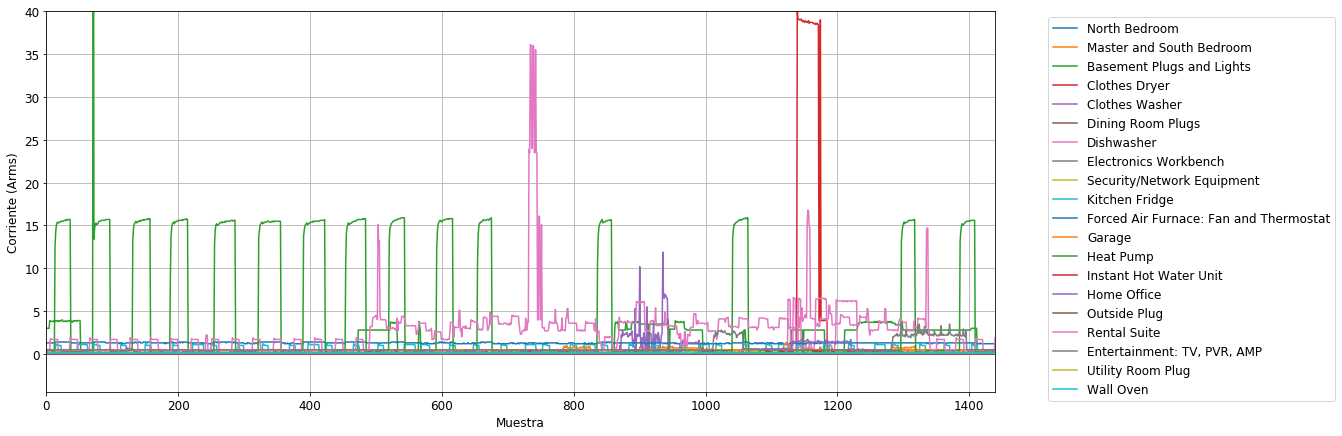

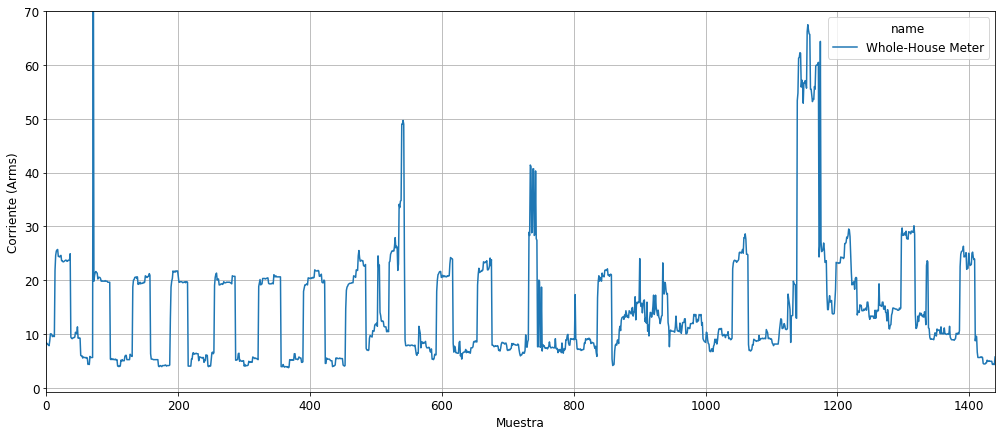

In [24]:
rcParams['font.style'] = 'normal'
rcParams['font.size'] = 12
rcParams['font.weight'] = 'normal'
individual[0].rename(columns=ampds_preprocessing.FULL_NAME).plot(figsize=(17,7))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Muestra')
plt.ylabel('Corriente (Arms)')
plt.grid(True)
plt.ylim((None, 40))
#plt.title('Señales de corriente')
plt.savefig('images/ampd_individual', bbox_inches='tight')
aggregate[0].rename(columns=ampds_preprocessing.FULL_NAME).plot(figsize=(17,7))
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Muestra')
plt.ylabel('Corriente (Arms)')
plt.grid(True)
plt.ylim((None, 70))
#plt.title('Señales de corriente')
plt.savefig('images/ampd_agg', bbox_inches='tight')

In [11]:
individual.shape

(1440, 14520)

In [13]:
DAYS_TO_TRAIN = 580
DAYS_TO_EVAL = 135
D = individual.loc[:, 0:DAYS_TO_TRAIN].to_numpy()
D[D<0] = 0
X = aggregate.loc[:, 715-DAYS_TO_EVAL:715].to_numpy()
X[X<0] = 0
np.save('arrays/DAYS_TO_TRAIN.npy', DAYS_TO_TRAIN)
np.save('arrays/DAYS_TO_EVAL.npy', DAYS_TO_EVAL)
np.save('arrays/X.npy', X)
np.save('arrays/D.npy', D)

In [11]:
D.shape, X.shape

((1440, 11620), (1440, 136))

In [16]:
DAYS_TO_TRAIN = 725
D = individual.loc[:, 0:DAYS_TO_TRAIN].to_numpy()
D[D<0] = 0
np.save('arrays/DAYS_TO_TRAINs.npy', DAYS_TO_TRAIN)
np.save('arrays/D_all.npy', D)


In [15]:
individual


day   0                                                 ...  725            \
name  B1E  B2E  BME  CDE  CWE  DNE  DWE  EBE  EQE  FGE  ...  FRE  GRE  HPE   
0     0.0  0.5  3.0  0.0  0.0  0.4  0.0  0.0  0.4  0.0  ...  1.5  0.5  0.4   
1     0.0  0.5  3.0  0.0  0.0  0.4  0.0  0.0  0.4  0.0  ...  1.5  0.5  0.4   
2     0.0  0.1  3.0  0.0  0.0  0.4  0.0  0.0  0.4  0.0  ...  1.5  0.5  0.4   
3     0.0  0.1  3.0  0.0  0.0  0.4  0.0  0.0  0.4  0.0  ...  1.5  0.5  0.4   
4     0.0  0.1  3.0  0.0  0.0  0.4  0.0  0.0  0.4  0.0  ...  1.5  0.5  0.4   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1435  0.0  0.1  0.2  0.0  0.0  0.0  0.0  0.0  0.4  0.1  ...  1.5  0.5  0.4   
1436  0.0  0.1  0.2  0.0  0.0  0.0  0.0  0.0  0.4  0.1  ...  1.5  0.5  0.4   
1437  0.0  0.1  0.2  0.0  0.0  0.0  0.0  0.0  0.4  0.1  ...  1.5  0.5  0.4   
1438  0.0  0.1  0.2  0.0  0.0  0.0  0.0  0.0  0.4  0.1  ...  1.5  0.5  0.4   
1439  0.0  0.1  0.2  0.0  0.0  0.0  0.0  0.0  0.4  0.1  ...  1.5  0.5  0.4   

day                                      
name  HTE  OFE  OUE  RSE  TVE  UTE  WOE  
0     0.0  0.2  0.0  0.5  0.2  0.4  0.1  
1     0.0  0.2  0.0  0.5  0.2  0.4  0.1  
2     0.0  0.2  0.0  1.9  0.2  0.4  0.1  
3     0.0  0.2  0.0  1.7  0.2  0.4  0.1  
4     0.0  0.2  0.0  1.7  0.2  0.4  0.1  
...   ...  ...  ...  ...  ...  ...  ...  
1435  0.0  0.2  0.0  1.7  0.2  0.4  0.1  
1436  0.0  0.2  0.0  1.7  0.2  0.4  0.1  
1437  0.0  0.2  0.0  1.7  0.2  0.4  0.1  
1438  0.0  0.2  0.0  1.7  0.2  0.4  0.1  
1439  0.0  0.2  0.0  1.7  0.2  0.4  0.1  

[1440 rows x 14520 columns]